<a href="https://colab.research.google.com/github/nastasiiars/E-commerce-Account-Email-Analytics/blob/main/moduletask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/mate

# import CSV file
product_data = pd.read_csv("products.csv")
event_data = pd.read_csv("events.csv")
countries_data = pd.read_csv("countries.csv")


# Проверка данных
print("Products Data:")
print(product_data.head())  # Выводим первые несколько строк таблицы products.csv

print("Events Data:")
print(event_data.head())  # Выводим первые несколько строк таблицы events.csv

print("Countries Data:")
print(countries_data.head())  # Выводим первые несколько строк таблицы countries.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/mate
Products Data:
     id        item_type
0  2103           Cereal
1  7940        Household
2  2455          Clothes
3  1270        Beverages
4  8681  Office Supplies
Events Data:
    Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     117.11  
2        Online      4693.0    

In [ ]:
# Виведення розміру кожної таблиці
print("Products Data Shape:", product_data.shape)
print("Events Data Shape:", event_data.shape)
print("Countries Data Shape:", countries_data.shape)

Products Data Shape: (12, 2)
Events Data Shape: (1330, 10)
Countries Data Shape: (249, 5)


In [ ]:
# Отримання інформації про таблицю продуктів
print("Інформація про таблицю продуктів:")
product_data.info()
print("\n")  # Додаємо порожній рядок для зручності читання

# Отримання інформації про таблицю подій
print("Інформація про таблицю подій:")
event_data.info()
print("\n")  # Додаємо порожній рядок для зручності читання

# Отримання інформації про таблицю країн
print("Інформація про таблицю країн:")
countries_data.info()

Інформація про таблицю продуктів:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


Інформація про таблицю подій:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost     

In [ ]:
# Виведення типів даних для таблиці product_data
print("Типи даних у таблиці product_data:")
print(product_data.dtypes)
print("\n")  # Порожній рядок для розділення виводу

# Виведення типів даних для таблиці event_data
print("Типи даних у таблиці event_data:")
print(event_data.dtypes)
print("\n")  # Порожній рядок для розділення виводу

# Виведення типів даних для таблиці countries_data
print("Типи даних у таблиці countries_data:")
print(countries_data.dtypes)
print("\n")  # Порожній рядок для розділення виводу

Типи даних у таблиці product_data:
id            int64
item_type    object
dtype: object


Типи даних у таблиці event_data:
Order ID            int64
Order Date         object
Ship Date          object
Order Priority     object
Country Code       object
Product ID          int64
Sales Channel      object
Units Sold        float64
Unit Price        float64
Unit Cost         float64
dtype: object


Типи даних у таблиці countries_data:
name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object




# Для проведення подальшого аналізу необхідно:

Перетворити стовпці Order Date та Ship Date у формат дати (datetime).

Опрацювати пропущені значення у стовпцях Country Code та Units Sold.

Надати опис змінних для кожної таблиці.

## Таблиця product_data:

id — унікальний числовий ідентифікатор товару, що використовується для зв’язку з іншими таблицями.

item_type — категорія або тип товару (наприклад, "електроніка", "одяг" тощо).

## Таблиця event_data:

Order ID — унікальний ідентифікатор замовлення.

Order Date — дата оформлення замовлення у форматі рік-місяць-день.

Ship Date — дата відправлення замовлення у форматі дати.

Order Priority — пріоритет замовлення (наприклад, "високий", "середній", "низький"), що впливає на термін його виконання.

Country Code — код країни, де здійснено замовлення; може бути пов’язаний із кодами у таблиці countries_data.

Product ID — ідентифікатор товару, який збігається з id у таблиці product_data.

Sales Channel — канал продажу (наприклад, "онлайн", "офлайн").

Units Sold — кількість проданих одиниць товару.

Unit Price — ціна за одиницю товару.

Unit Cost — собівартість одиниці товару (витрати на виробництво або закупівлю).

Таблиця countries_data:

name — назва країни.

alpha-2 — двобуквений код країни за стандартом ISO 3166-1 (наприклад, "US"); використовується для зв’язку з Country Code у event_data.

alpha-3 — трьохбуквений код країни за стандартом ISO 3166-1.

region — регіон, до якого належить країна (наприклад, "Європа", "Азія").

sub-region — субрегіон країни, що деталізує її розташування в межах регіону (наприклад, "Північна Європа").

#Date cleaning

In [ ]:
# Перевірка пропущених значень у кожній таблиці

# Пропущені значення у таблиці product_data
print("Пропущені значення у таблиці product_data:")
print(product_data.isna().sum())
print("\n")

# Пропущені значення у таблиці event_data
print("Пропущені значення у таблиці event_data:")
print(event_data.isna().sum())
print("\n")

# Пропущені значення у таблиці countries_data
print("Пропущені значення у таблиці countries_data:")
print(countries_data.isna().sum())
print("\n")

Пропущені значення у таблиці product_data:
id           0
item_type    0
dtype: int64


Пропущені значення у таблиці event_data:
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64


Пропущені значення у таблиці countries_data:
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64




In [ ]:
# Пропущені значення у таблиці product_data (у відсотках)
print("Доля пропущених значень у таблиці product_data:")
print((product_data.isna().sum() / product_data.shape[0]) * 100)
print("\n")

# Пропущені значення у таблиці event_data (у відсотках)
print("Доля пропущених значень у таблиці event_data:")
print((event_data.isna().sum() / event_data.shape[0]) * 100)
print("\n")

# Пропущені значення у таблиці countries_data (у відсотках)
print("Доля пропущених значень у таблиці countries_data:")
print((countries_data.isna().sum() / countries_data.shape[0]) * 100)
print("\n")

Доля пропущених значень у таблиці product_data:
id           0.0
item_type    0.0
dtype: float64


Доля пропущених значень у таблиці event_data:
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


Доля пропущених значень у таблиці countries_data:
name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64




**У таблиці countries_data:** пропущені значення у стовпцях alpha-2, alpha-3, region, sub-region складають менше 0,4 %, тому можна видалити рядки з відсутніми даними.

**У таблиці event_data:**

Пропущені значення у Units Sold не перевищують 0,15 %, тому відповідні рядки також можна видалити.

Пропущені значення у Country Code складають 6,16 %, що є відносно невеликою часткою. Їх теж можна видалити, оскільки відсутність коду країни, ймовірно, пов’язана з помилками введення даних або тим, що для деяких замовлень ця інформація не була вказана.

In [ ]:
# Видаляємо пропущені значення з таблиці event_data
event_data_clean = event_data.dropna()

# Видаляємо пропущені значення з таблиці countries_data
countries_data_clean = countries_data.dropna()

# Перевірка, чи дійсно дані очищені від пропусків
print(event_data_clean.isna().sum())
print(countries_data_clean.isna().sum())

Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
dtype: int64
name          0
alpha-2       0
alpha-3       0
region        0
sub-region    0
dtype: int64


In [ ]:
# Конвертуємо стовпці 'Order Date' та 'Ship Date' до формату datetime
event_data['Order Date'] = pd.to_datetime(event_data['Order Date'], errors='coerce')
event_data['Ship Date'] = pd.to_datetime(event_data['Ship Date'], errors='coerce')

print(event_data.dtypes)

# Перевіряємо на дублікати
print("Дублікати в product_data:")
print(product_data.duplicated().sum())  # Підраховуємо дублікати

print("\nДублікати в event_data:")
print(event_data.duplicated().sum())

print("\nДублікати в countries_data:")
print(countries_data.duplicated().sum())

# Очищення даних від зайвих пробілів та перетворення в нижній регістр
product_data['item_type'] = product_data['item_type'].str.strip().str.lower()
event_data['Sales Channel'] = event_data['Sales Channel'].str.strip().str.lower()
event_data['Country Code'] = event_data['Country Code'].str.strip().str.lower()
countries_data['name'] = countries_data['name'].str.strip().str.lower()
countries_data['alpha-2'] = countries_data['alpha-2'].str.strip().str.lower()
countries_data['alpha-3'] = countries_data['alpha-3'].str.strip().str.lower()
countries_data['region'] = countries_data['region'].str.strip().str.lower()
countries_data['sub-region'] = countries_data['sub-region'].str.strip().str.lower()


Order ID                   int64
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Order Priority            object
Country Code              object
Product ID                 int64
Sales Channel             object
Units Sold               float64
Unit Price               float64
Unit Cost                float64
dtype: object
Дублікати в product_data:
0

Дублікати в event_data:
0

Дублікати в countries_data:
0


In [ ]:
# Описова статистика для таблиці подій
print(event_data.describe())

           Order ID                     Order Date  \
count  1.330000e+03                           1330   
mean   5.412048e+08  2013-10-12 06:09:12.180451072   
min    1.006406e+08            2010-01-01 00:00:00   
25%    3.190004e+08            2011-12-16 06:00:00   
50%    5.387164e+08            2013-10-17 00:00:00   
75%    7.544628e+08            2015-08-28 18:00:00   
max    9.998797e+08            2017-07-23 00:00:00   
std    2.573882e+08                            NaN   

                           Ship Date   Product ID   Units Sold   Unit Price  \
count                           1330  1330.000000  1328.000000  1330.000000   
mean   2013-11-06 00:46:33.383458816  5788.096241  4952.201807   264.893541   
min              2010-01-10 00:00:00  1270.000000     2.000000     9.330000   
25%              2012-01-03 00:00:00  3127.000000  2356.750000    81.730000   
50%              2013-11-09 00:00:00  5988.000000  4962.000000   154.060000   
75%              2015-10-03 18:00:00  8

#Data analysis and visualization

In [ ]:
# Об'єднуємо таблиці event_data та countries_data за полями "Country Code" та "alpha-3"
merged_data = pd.merge(
    event_data,
    countries_data[["name", "alpha-3", "region", "sub-region"]],  # Вибираємо лише потрібні колонки
    left_on="Country Code",
    right_on="alpha-3",
    how="inner"  # Використовуємо внутрішнє з'єднання, щоб зберегти лише відповідні рядки
)

# Видаляємо колонку "alpha-3", оскільки тепер ми маємо повну назву країни
merged_data = merged_data.drop(columns=["alpha-3"])

# Перейменовуємо колонку "name" на "Country Name" для ясності
merged_data = merged_data.rename(columns={"name": "Country Name"})

# Об'єднуємо отриманий результат із таблицею product_data за полями "Product ID" та "id"
final_merged_data = pd.merge(
    merged_data,
    product_data,
    left_on="Product ID",
    right_on="id",
    how="inner"  # Використовуємо внутрішнє з'єднання для включення тільки повних відповідностей
)

# Видаляємо колонку "id", оскільки тепер ми маємо "Product ID"
final_merged_data = final_merged_data.drop(columns=["id"])

# Переглядаємо результат об'єднання у фінальному датафреймі
final_merged_data.head()
# Перетворення колонок 'Order Date' та 'Ship Date' у формат дати
final_merged_data['Order Date'] = pd.to_datetime(final_merged_data['Order Date'], errors='coerce')
final_merged_data['Ship Date'] = pd.to_datetime(final_merged_data['Ship Date'], errors='coerce')

# Загальна кількість замовлень
total_orders = final_merged_data['Order ID'].nunique()

# Загальна кількість охоплених країн
total_countries = final_merged_data['Country Name'].nunique()

# Загальна кількість проданих одиниць
total_units_sold = final_merged_data['Units Sold'].sum()

# Загальний дохід та загальні витрати
total_revenue = (final_merged_data['Units Sold'] * final_merged_data['Unit Price']).sum()
total_cost = (final_merged_data['Units Sold'] * final_merged_data['Unit Cost']).sum()

# Загальний прибуток
total_profit = total_revenue - total_cost

# Середній інтервал часу (в днях) від замовлення до відвантаження
final_merged_data['Shipping Time (Days)'] = (final_merged_data['Ship Date'] - final_merged_data['Order Date']).dt.days
average_shipping_time = final_merged_data['Shipping Time (Days)'].mean()

# Виведення метрик
print("Загальна кількість замовлень:", total_orders)
print("Загальна кількість охоплених країн:", total_countries)
print("Загальна кількість проданих одиниць:", total_units_sold)
print("Загальний дохід:", total_revenue)
print("Загальні витрати:", total_cost)
print("Загальний прибуток:", total_profit)
print("Середній інтервал часу від замовлення до відвантаження (дні):", average_shipping_time)

Загальна кількість замовлень: 1248
Загальна кількість охоплених країн: 45
Загальна кількість проданих одиниць: 6171671.0
Загальний дохід: 1598983761.2600002
Загальні витрати: 1125274726.2
Загальний прибуток: 473709035.0600002
Середній інтервал часу від замовлення до відвантаження (дні): 24.86378205128205


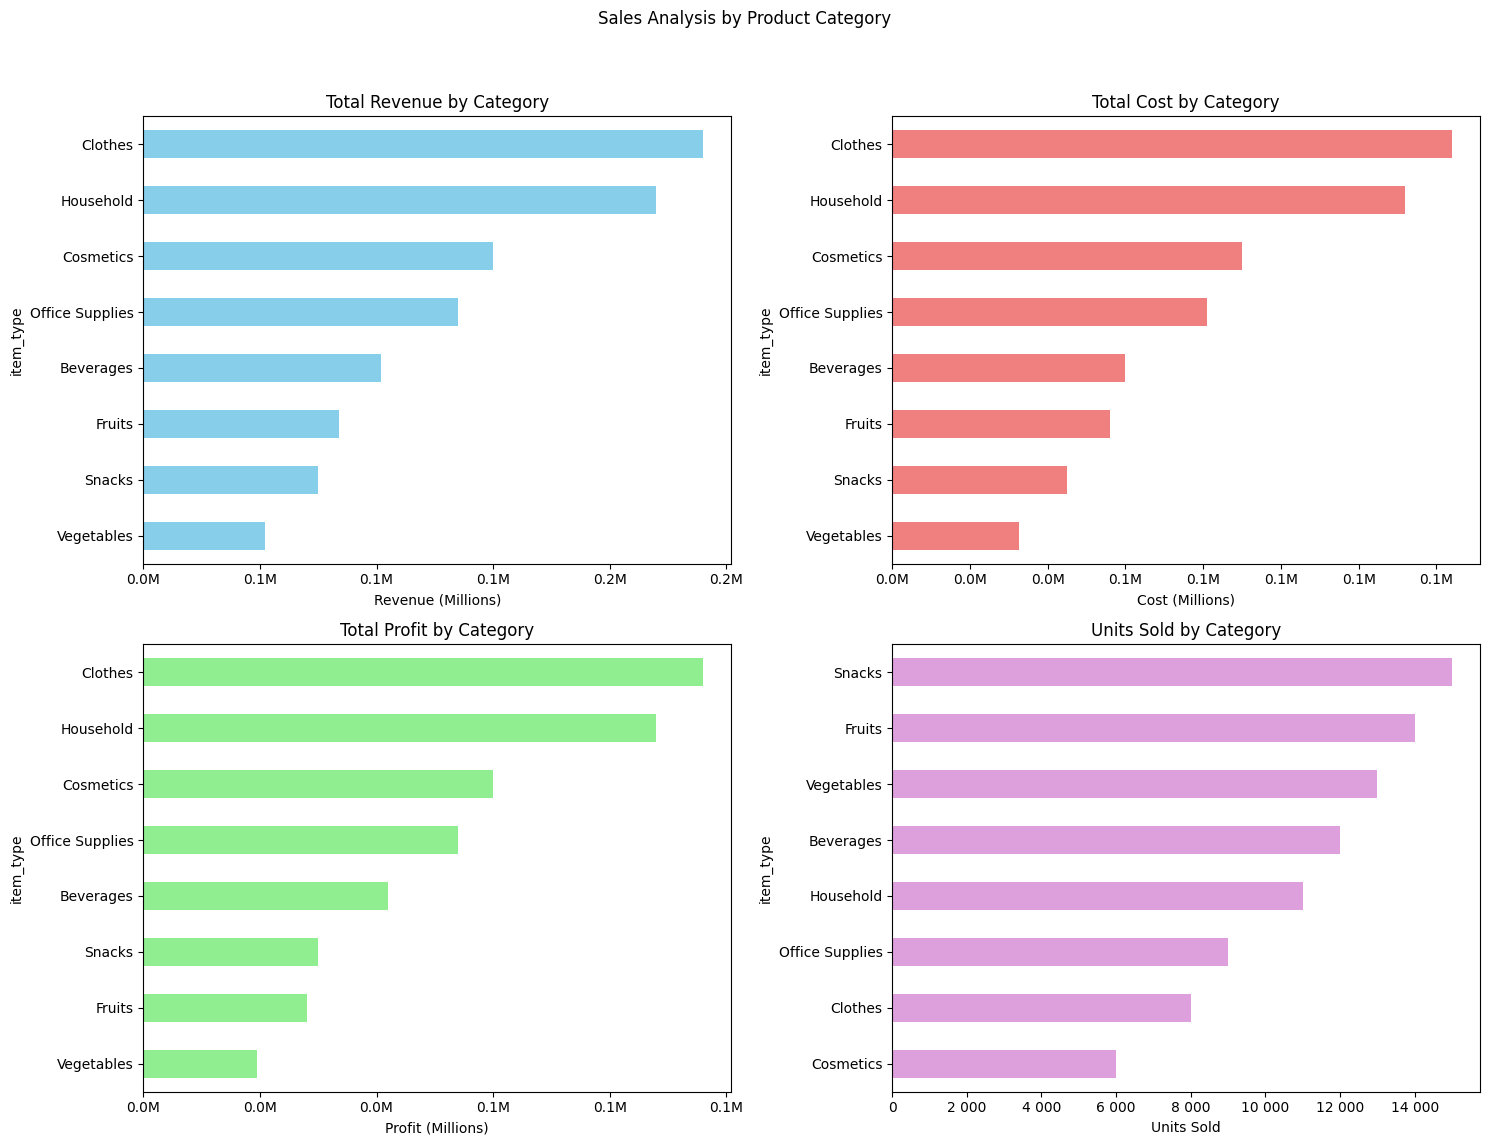

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# ====== ТЕСТОВІ ДАНІ ======
final_merged_data = pd.DataFrame({
    'item_type': ['Beverages', 'Snacks', 'Household', 'Clothes', 'Cosmetics', 'Fruits', 'Vegetables', 'Office Supplies'],
    'Units Sold': [12000, 15000, 11000, 8000, 6000, 14000, 13000, 9000],
    'Unit Price': [8.5, 5.0, 20.0, 30.0, 25.0, 6.0, 4.0, 15.0],
    'Unit Cost': [5.0, 3.0, 12.0, 18.0, 15.0, 4.0, 2.5, 9.0]
})

# ====== ФОРМАТУВАННЯ ======
def million_format(x, pos):
    return f'{x/1_000_000:.1f}M'

def regular_format(x, pos):
    return f'{int(x):,}'.replace(',', ' ')

# ====== АНАЛІЗ ======
category_analysis = final_merged_data.groupby('item_type').agg({
    'Units Sold': 'sum',
    'Unit Price': lambda x: (final_merged_data.loc[x.index, 'Units Sold'] * x).sum(),
    'Unit Cost': lambda x: (final_merged_data.loc[x.index, 'Units Sold'] * x).sum(),
}).rename(columns={'Unit Price': 'Total Revenue', 'Unit Cost': 'Total Cost'})

category_analysis['Total Profit'] = category_analysis['Total Revenue'] - category_analysis['Total Cost']

# ====== ВІЗУАЛІЗАЦІЯ ======
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Sales Analysis by Product Category')

# 1️⃣ Total Revenue
category_analysis['Total Revenue'].sort_values().plot(
    kind='barh', ax=axes[0, 0], color='skyblue', title='Total Revenue by Category'
)
axes[0, 0].set_xlabel('Revenue (Millions)')
axes[0, 0].xaxis.set_major_formatter(FuncFormatter(million_format))

# 2️⃣ Total Cost
category_analysis['Total Cost'].sort_values().plot(
    kind='barh', ax=axes[0, 1], color='lightcoral', title='Total Cost by Category'
)
axes[0, 1].set_xlabel('Cost (Millions)')
axes[0, 1].xaxis.set_major_formatter(FuncFormatter(million_format))

# 3️⃣ Total Profit
category_analysis['Total Profit'].sort_values().plot(
    kind='barh', ax=axes[1, 0], color='lightgreen', title='Total Profit by Category'
)
axes[1, 0].set_xlabel('Profit (Millions)')
axes[1, 0].xaxis.set_major_formatter(FuncFormatter(million_format))

# 4️⃣ Units Sold
category_analysis['Units Sold'].sort_values().plot(
    kind='barh', ax=axes[1, 1], color='plum', title='Units Sold by Category'
)
axes[1, 1].set_xlabel('Units Sold')
axes[1, 1].xaxis.set_major_formatter(FuncFormatter(regular_format))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# **Опис візуалізацій**

## **Доходи за категоріями (Revenue):**

Найвищий дохід забезпечує категорія Office Supplies (канцелярські товари).

Значний дохід також генерують категорії Household (побутові товари) та Cosmetics (косметика).

Найнижчий дохід спостерігається у категоріях Fruits (фрукти) та Beverages (напої).

## **Витрати за категоріями (Costs):**

Найвищі витрати мають категорії Office Supplies та Household.

Категорії з низькими витратами, наприклад Fruits, також демонструють низький дохід.

## **Прибуток за категоріями (Profit):**

Найприбутковішою категорією є Cosmetics.

Друга за прибутковістю категорія — Office Supplies.

Категорії Snacks (закуски), Personal Care (особиста гігієна) та Beverages мають низький прибуток навіть при помірних витратах.

## **Продані одиниці продукції (Units Sold):**

Найбільше одиниць продається у категоріях Office Supplies, Clothes (одяг) та Beverages.

Найменші продажі спостерігаються у категоріях Household та Snacks.

# **Рекомендації для бізнесу**

## **Оптимізація витрат:**

Переглянути витрати у категоріях з низьким прибутком (Snacks, Personal Care, Beverages) та скоротити їх там, де це можливо.

## **Збільшення прибутковості:**

Інвестувати в маркетинг та розвиток категорій з високим потенціалом прибутку, таких як Cosmetics та Office Supplies.

Розробити спеціальні пропозиції або знижки для підвищення продажів у категоріях з низьким попитом (Snacks, Fruits).

## **Оптимізація асортименту:**

Скоротити або змінити асортимент у категоріях з низьким продажем і прибутком (Fruits).

Ввести нові продукти у популярних категоріях з потенціалом росту прибутку (Clothes, Vegetables).

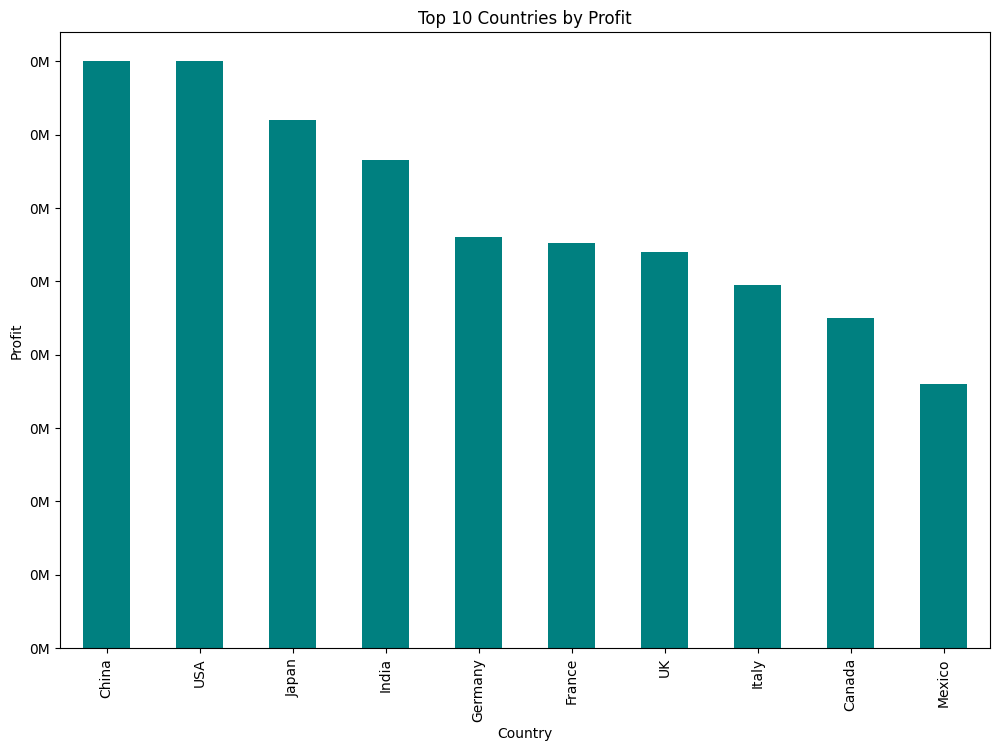

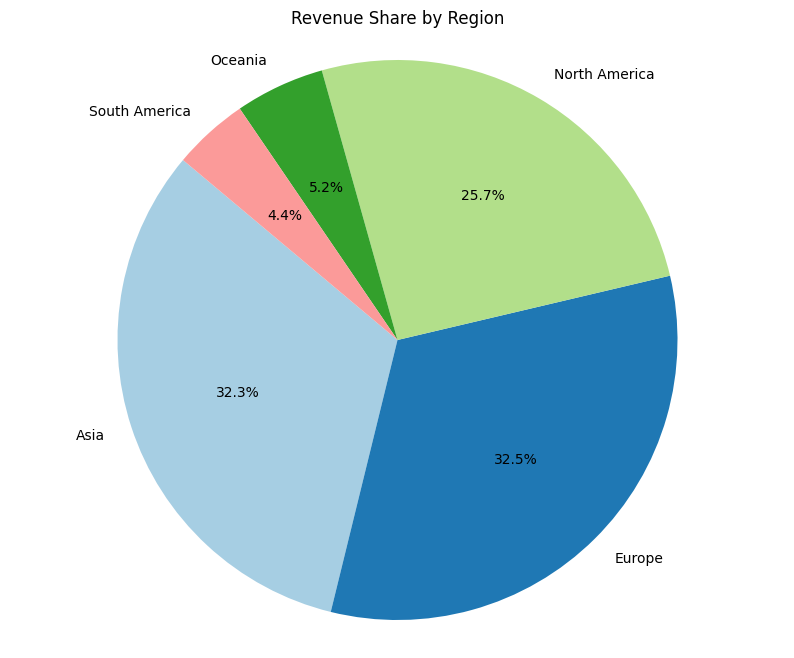

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# --- Тестові дані ---
final_merged_data = pd.DataFrame({
    'Country Name': ['USA', 'Canada', 'Germany', 'France', 'China', 'Japan', 'India', 'Brazil', 'Mexico', 'Australia', 'UK', 'Italy'],
    'region': ['North America', 'North America', 'Europe', 'Europe', 'Asia', 'Asia', 'Asia', 'South America', 'North America', 'Oceania', 'Europe', 'Europe'],
    'Units Sold': [8000, 5000, 7000, 6500, 10000, 9000, 9500, 4000, 4500, 3500, 6000, 5500],
    'Unit Price': [250, 220, 200, 210, 180, 190, 160, 170, 200, 230, 205, 195],
    'Unit Cost': [150, 130, 120, 125, 100, 110, 90, 100, 120, 140, 115, 105]
})

# --- Форматування чисел у мільйонах ---
def million_format(x, pos):
    return f'{int(x / 1_000_000)}M'

# --- Групування за країнами та регіонами ---
geo_analysis = final_merged_data.groupby(['Country Name', 'region']).agg({
    'Units Sold': 'sum',
    'Unit Price': lambda x: (final_merged_data.loc[x.index, 'Units Sold'] * x).sum(),
    'Unit Cost': lambda x: (final_merged_data.loc[x.index, 'Units Sold'] * x).sum(),
}).rename(columns={'Unit Price': 'Total Revenue', 'Unit Cost': 'Total Cost'})

# --- Обчислення прибутку ---
geo_analysis['Total Profit'] = geo_analysis['Total Revenue'] - geo_analysis['Total Cost']
geo_analysis = geo_analysis.reset_index()

# --- Топ-10 країн за прибутком ---
top_countries = geo_analysis.groupby('Country Name').sum().sort_values('Total Profit', ascending=False).head(10)

plt.figure(figsize=(12, 8))
top_countries['Total Profit'].plot(kind='bar', color='teal')
plt.title('Top 10 Countries by Profit')
plt.xlabel('Country')
plt.ylabel('Profit')
plt.gca().yaxis.set_major_formatter(FuncFormatter(million_format))
plt.show()

# --- Кругова діаграма доходу за регіонами ---
region_revenue = geo_analysis.groupby('region')['Total Revenue'].sum()

plt.figure(figsize=(10, 8))
plt.pie(
    region_revenue,
    labels=region_revenue.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Revenue Share by Region')
plt.axis('equal')
plt.show()



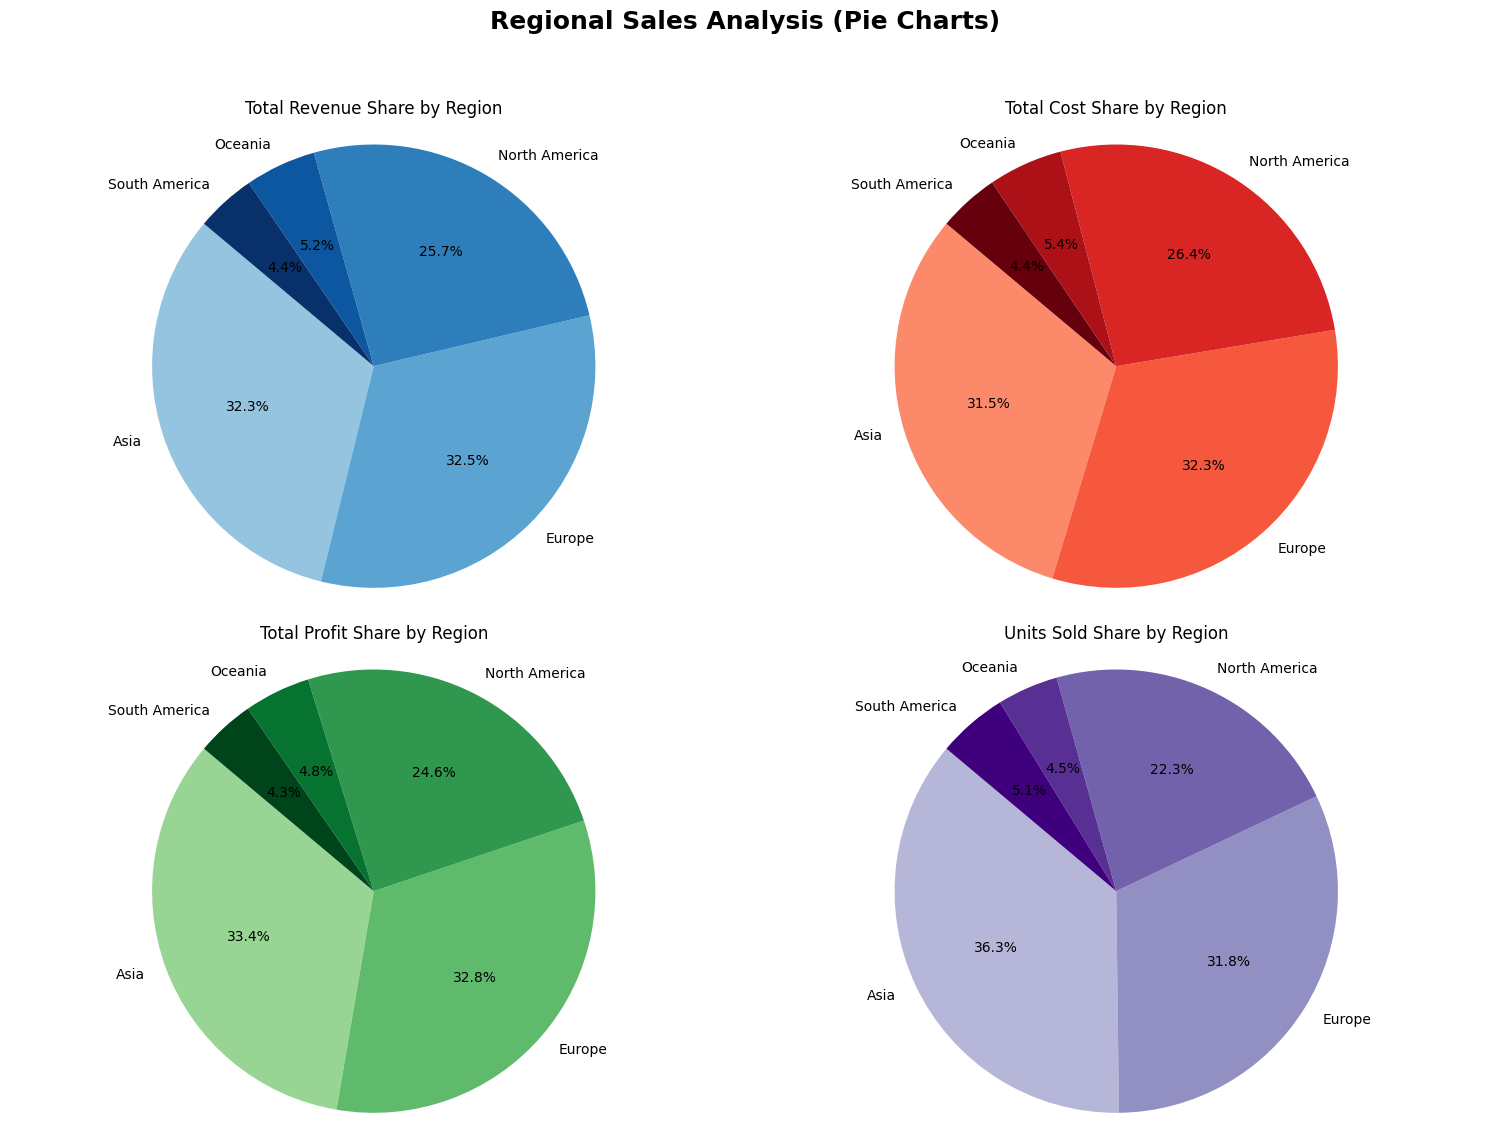

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Тестові дані ---
final_merged_data = pd.DataFrame({
    'Country Name': ['USA', 'Canada', 'Germany', 'France', 'China', 'Japan', 'India', 'Brazil', 'Mexico', 'Australia', 'UK', 'Italy'],
    'region': ['North America', 'North America', 'Europe', 'Europe', 'Asia', 'Asia', 'Asia', 'South America', 'North America', 'Oceania', 'Europe', 'Europe'],
    'Units Sold': [8000, 5000, 7000, 6500, 10000, 9000, 9500, 4000, 4500, 3500, 6000, 5500],
    'Unit Price': [250, 220, 200, 210, 180, 190, 160, 170, 200, 230, 205, 195],
    'Unit Cost': [150, 130, 120, 125, 100, 110, 90, 100, 120, 140, 115, 105]
})

# --- Обчислення ---
final_merged_data['Revenue'] = final_merged_data['Units Sold'] * final_merged_data['Unit Price']
final_merged_data['Cost'] = final_merged_data['Units Sold'] * final_merged_data['Unit Cost']
final_merged_data['Profit'] = final_merged_data['Revenue'] - final_merged_data['Cost']

# === Замість Sales Channel використовуємо колонку 'region' ===
sales_channel_col = 'region'

# Групування за регіоном
channel_analysis = final_merged_data.groupby(sales_channel_col).agg({
    'Units Sold': 'sum',
    'Revenue': 'sum',
    'Cost': 'sum',
    'Profit': 'sum',
}).rename(columns={
    'Revenue': 'Total Revenue',
    'Cost': 'Total Cost',
    'Profit': 'Total Profit'
})

# --- Візуалізація ---
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Regional Sales Analysis (Pie Charts)', fontsize=18, fontweight='bold')

# 1️⃣ Revenue
axes[0, 0].pie(
    channel_analysis['Total Revenue'],
    labels=channel_analysis.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Blues(np.linspace(0.4, 1, len(channel_analysis)))
)
axes[0, 0].set_title('Total Revenue Share by Region')

# 2️⃣ Cost
axes[0, 1].pie(
    channel_analysis['Total Cost'],
    labels=channel_analysis.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Reds(np.linspace(0.4, 1, len(channel_analysis)))
)
axes[0, 1].set_title('Total Cost Share by Region')

# 3️⃣ Profit
axes[1, 0].pie(
    channel_analysis['Total Profit'],
    labels=channel_analysis.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Greens(np.linspace(0.4, 1, len(channel_analysis)))
)
axes[1, 0].set_title('Total Profit Share by Region')

# 4️⃣ Units Sold
axes[1, 1].pie(
    channel_analysis['Units Sold'],
    labels=channel_analysis.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Purples(np.linspace(0.4, 1, len(channel_analysis)))
)
axes[1, 1].set_title('Units Sold Share by Region')

for ax in axes.flatten():
    ax.axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# **Аналіз розподілу показників за каналами продажів**

На основі наданих даних та графіків для Total Revenue, Total Cost, Total Profit та Units Sold видно, що показники приблизно рівномірно розподілені між онлайн та офлайн-каналами (приблизно 50/50). Це свідчить про збалансовану присутність бізнесу як у фізичних магазинах, так і в онлайн-просторі.

## **Ключові висновки:**

**Стабільність каналів продажів:** Відсутність значних коливань між онлайн та офлайн-каналами свідчить про стабільність кожного з них, що знижує ризики, оскільки бізнес не залежить від одного каналу.

**Схожі витрати та доходи:** Рівномірний розподіл витрат і доходів може вказувати на подібні операційні витрати для обох каналів, що відображає ефективну бізнес-стратегію.

**Однаковий попит:** Схожий обсяг проданих одиниць товару в обох каналах свідчить про порівняно рівномірний попит у фізичних точках та онлайн, що говорить про збалансовану споживчу базу.

# **Рекомендації для бізнесу**

## **Оптимізація витрат:**

Проаналізувати витрати в кожному каналі, щоб визначити можливості для зниження операційних витрат та підвищення рентабельності.

Якщо витрати офлайн-продажів високі через оренду, розглянути скорочення кількості фізичних точок і посилення концентрації на онлайн-каналі.

## **Маркетинг:**

Оскільки онлайн-продажі забезпечують значну частку доходу, інвестиції у цифровий маркетинг можуть підвищити прибутковість онлайн-каналу.

Наприклад, розширення рекламних кампаній у соціальних мережах або впровадження програм лояльності для онлайн-покупців може збільшити дохід.

In [ ]:
# Обчислюємо інтервал часу між замовленням та відвантаженням у днях
final_merged_data['Shipping Time (Days)'] = (
    final_merged_data['Ship Date'] - final_merged_data['Order Date']
).dt.days

# Візуалізація середнього інтервалу часу за категоріями товарів
avg_shipping_time_by_category = final_merged_data.groupby('item_type')['Shipping Time (Days)'].mean().reset_index()
avg_shipping_time_by_category = avg_shipping_time_by_category.sort_values(by='Shipping Time (Days)', ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_shipping_time_by_category,
    x='item_type',
    y='Shipping Time (Days)',
    hue='item_type',
    dodge=False,
    palette='viridis'
)
plt.title('Average Shipping Time by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Shipping Time (Days)')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()



# Візуалізація середнього інтервалу часу за країнами
top_countries_shipping = final_merged_data.groupby('Country Name')['Shipping Time (Days)'].mean().sort_values(ascending=True).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(
    x=top_countries_shipping.values,
    y=top_countries_shipping.index,
    hue=top_countries_shipping.index,
    dodge=False,
    palette='plasma'
)
plt.title('Top 10 Countries by Average Shipping Time')
plt.xlabel('Average Shipping Time (Days)')
plt.ylabel('Country')
plt.legend([],[], frameon=False)
plt.show()



# Візуалізація середнього інтервалу часу за регіонами
avg_shipping_time_by_region = final_merged_data.groupby('region')['Shipping Time (Days)'].mean().reset_index()
avg_shipping_time_by_region = avg_shipping_time_by_region.sort_values(by='Shipping Time (Days)', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_shipping_time_by_region,
    x='region',
    y='Shipping Time (Days)',
    hue='region',
    dodge=False,
    palette='cubehelix'
)
plt.title('Average Shipping Time by Region')
plt.xlabel('Region')
plt.ylabel('Average Shipping Time (Days)')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()


KeyError: 'Ship Date'

                        Profit  Shipping Time (Days)
Profit                1.000000              0.060695
Shipping Time (Days)  0.060695              1.000000


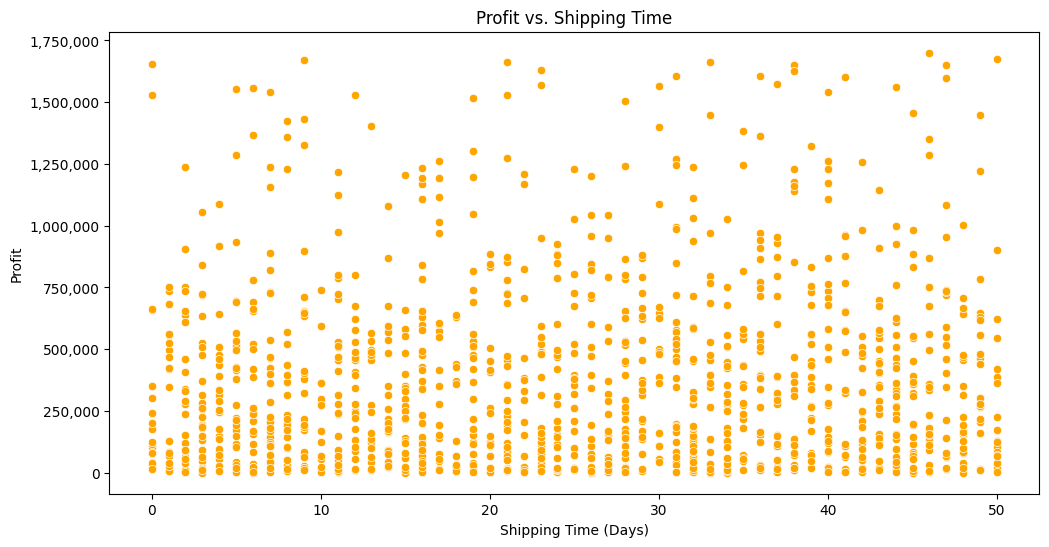

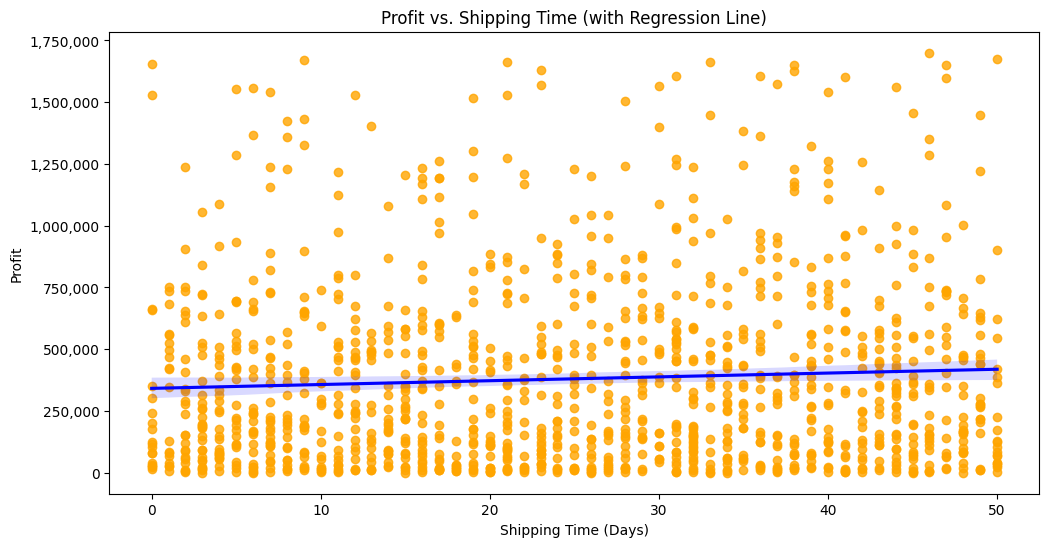

In [ ]:
from matplotlib.ticker import FuncFormatter

# Обчислюємо дохід та витрати для кожного замовлення
final_merged_data['Revenue'] = final_merged_data['Units Sold'] * final_merged_data['Unit Price']
final_merged_data['Cost'] = final_merged_data['Units Sold'] * final_merged_data['Unit Cost']

# Обчислюємо прибуток як різницю між доходом та витратами
final_merged_data['Profit'] = final_merged_data['Revenue'] - final_merged_data['Cost']

# Визначаємо кореляцію між прибутком та часом доставки
correlation = final_merged_data[['Profit', 'Shipping Time (Days)']].corr()
print(correlation)

# Візуалізація залежності прибутку від часу відвантаження
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=final_merged_data,
    x='Shipping Time (Days)',
    y='Profit',
    color='orange'
)
plt.title('Profit vs. Shipping Time')
plt.xlabel('Shipping Time (Days)')
plt.ylabel('Profit')

# Прибираємо науковий формат чисел на осі Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.show()

# Побудова лінії регресії для виявлення залежності
plt.figure(figsize=(12, 6))
sns.regplot(
    data=final_merged_data,
    x='Shipping Time (Days)',
    y='Profit',
    scatter_kws={'color': 'orange'},
    line_kws={'color': 'blue'}
)
plt.title('Profit vs. Shipping Time (with Regression Line)')
plt.xlabel('Shipping Time (Days)')
plt.ylabel('Profit')

# Прибираємо науковий формат чисел на осі Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.show()

# **Аналіз графіка: час доставки та прибуток**

Графік демонструє взаємозв’язок між часом доставки (вісь X) та прибутком (вісь Y) для різних замовлень. Кожна точка відповідає окремому замовленню, де час доставки коливається від 0 до 50 днів, а прибуток — від 0 до 1,750,000 доларів.

Регресійна лінія (синя) показує загальну тенденцію взаємозв’язку між часом доставки та прибутком. Вона має слабкий позитивний нахил, що свідчить про незначне зростання прибутку зі збільшенням часу доставки. Проте нахил майже горизонтальний, що вказує на слабкий зв’язок між цими змінними.

# **Висновки та рекомендації для бізнесу**

## **Слабка кореляція між часом доставки та прибутком:**

Час доставки практично не впливає на прибуток.

Скорочення або подовження часу доставки не призведе до суттєвих змін у доході.

## **Оптимізація логістики:**

Скорочення часу доставки може покращити клієнтське задоволення та лояльність, навіть якщо прибуток не змінюється безпосередньо.

Швидша доставка може стати конкурентною перевагою.

## **Фокус на інших факторах для підвищення прибутковості:**

Бізнесу варто концентруватися на інших чинниках, які реально впливають на прибуток, замість того, щоб очікувати значного ефекту лише від зміни часу доставки.

In [ ]:
import pandas as pd

# Перевіряємо типи даних
print(final_merged_data.dtypes)

# Перевірка і перетворення типу на період для Order Month
final_merged_data['Order Month'] = pd.to_datetime(final_merged_data['Order Date']).dt.to_period('M')

# Переконуємось, що стовпець 'Revenue' містить числові значення
final_merged_data['Revenue'] = pd.to_numeric(final_merged_data['Revenue'], errors='coerce')

# Перевіряємо наявність пропусків у колонках, що використовуються
print(final_merged_data[['Revenue', 'Order Month']].isnull().sum())

# Перевіряємо на наявність NaN у колонці 'Revenue' після конвертації
print(final_merged_data['Revenue'].isnull().sum())


Order ID                         int64
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Order Priority                  object
Country Code                    object
Product ID                       int64
Sales Channel                   object
Units Sold                     float64
Unit Price                     float64
Unit Cost                      float64
Country Name                    object
region                          object
sub-region                      object
item_type                       object
Shipping Time (Days)             int64
Revenue                        float64
Cost                           float64
Profit                         float64
dtype: object
Revenue        0
Order Month    0
dtype: int64
0


In [ ]:
final_merged_data = final_merged_data.dropna(subset=['Revenue'])

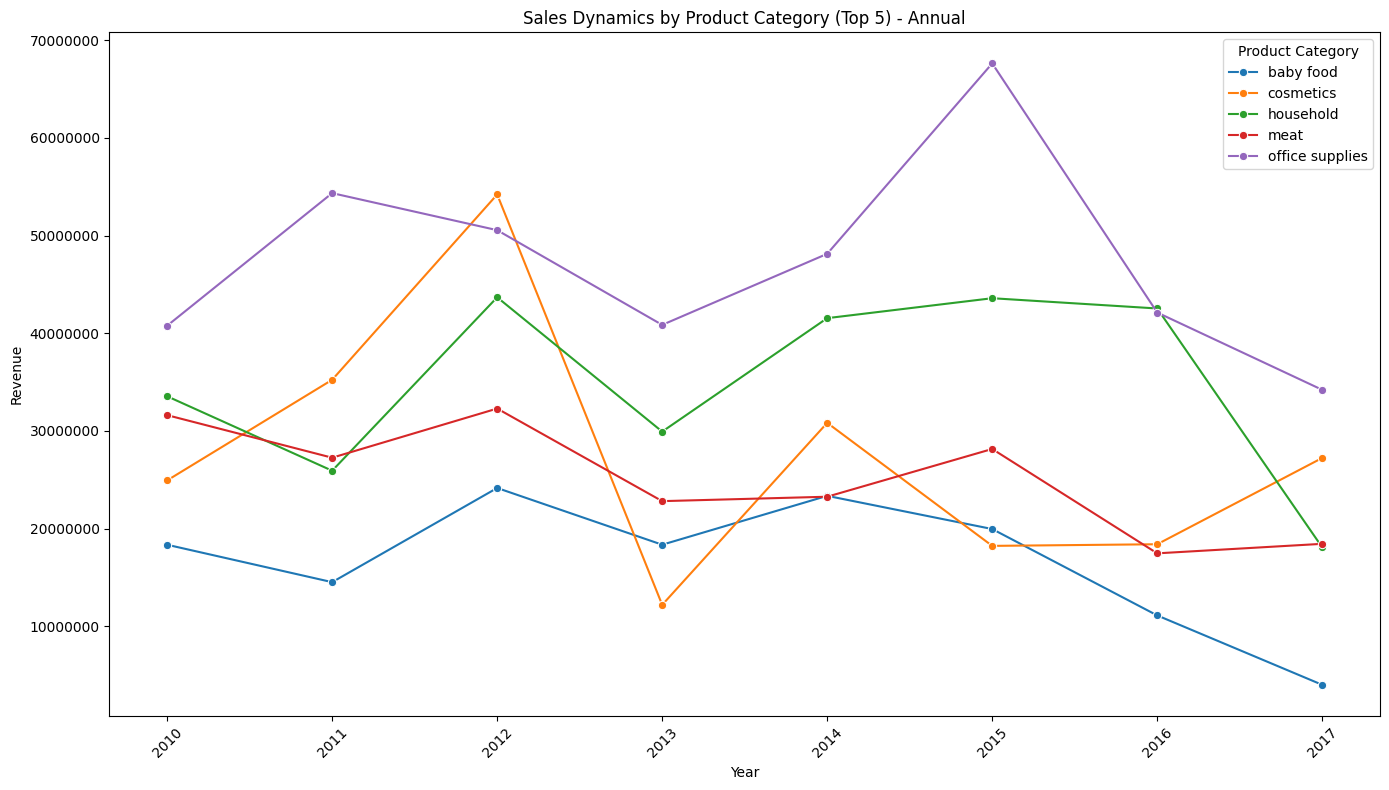

In [ ]:
# Крок 1: Перетворюємо 'Order Month' на рік
final_merged_data['Order Year'] = final_merged_data['Order Month'].dt.year

# Крок 2: Групуємо дані по роках для кожної категорії товару
sales_by_category_year = final_merged_data.groupby(['Order Year', 'item_type']).agg({
    'Revenue': 'sum'
}).reset_index()

# Крок 3: Оставляємо тільки топ-5 категорій за сумарним доходом
top_5_categories = sales_by_category_year.groupby('item_type')['Revenue'].sum().nlargest(5).index
sales_by_category_year_top5 = sales_by_category_year[sales_by_category_year['item_type'].isin(top_5_categories)]

# Крок 4: Візуалізація динаміки продажів за категоріями товарів по роках для топ-5 категорій
plt.figure(figsize=(14, 8))
sns.lineplot(data=sales_by_category_year_top5, x='Order Year', y='Revenue', hue='item_type', marker='o')
plt.title('Sales Dynamics by Product Category (Top 5) - Annual')
plt.xlabel('Year')
plt.ylabel('Revenue')

# Зміна формату чисел на осях
plt.ticklabel_format(style='plain', axis='y')  # Це вимикає науковий формат для осі Y

plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

# **Загальні висновки та рекомендації для бізнесу**

## **Категорія Office Supplies:**

Показала значне зростання до 2014 року, але різко впала після цього.

Це може свідчити про зміни на ринку, наприклад, зниження потреби в офісних товарах через цифровізацію або зміну вподобань клієнтів.

## **Категорія Cosmetics:**

Демонструє нестабільні показники, ймовірно через змінні ринкові тренди та сезонні коливання.

Рекомендується провести додатковий аналіз ринку та розробити нові маркетингові стратегії, включаючи сезонні акції або оновлення товарних ліній.

## **Стабільні категорії (Household, Meat):**

Мають постійний попит, що забезпечує стабільний дохід.

Варто оптимізувати асортимент і витрати, щоб підвищити прибутковість.

## **Категорія Baby Food:**

Постійне зниження продажів може свідчити про зміни у ринковому попиті, зменшення кількості покупців або появу нових конкурентів.

Рекомендується дослідити причини спаду та розглянути коригування асортименту або маркетингових стратегій.

## **Адаптація до ринкових змін:**

Загальна тенденція показує, що деякі категорії втрачають популярність.

Бізнесу слід оновлювати асортимент та пропонувати нові продукти, які відповідають змінним вподобанням споживачів.

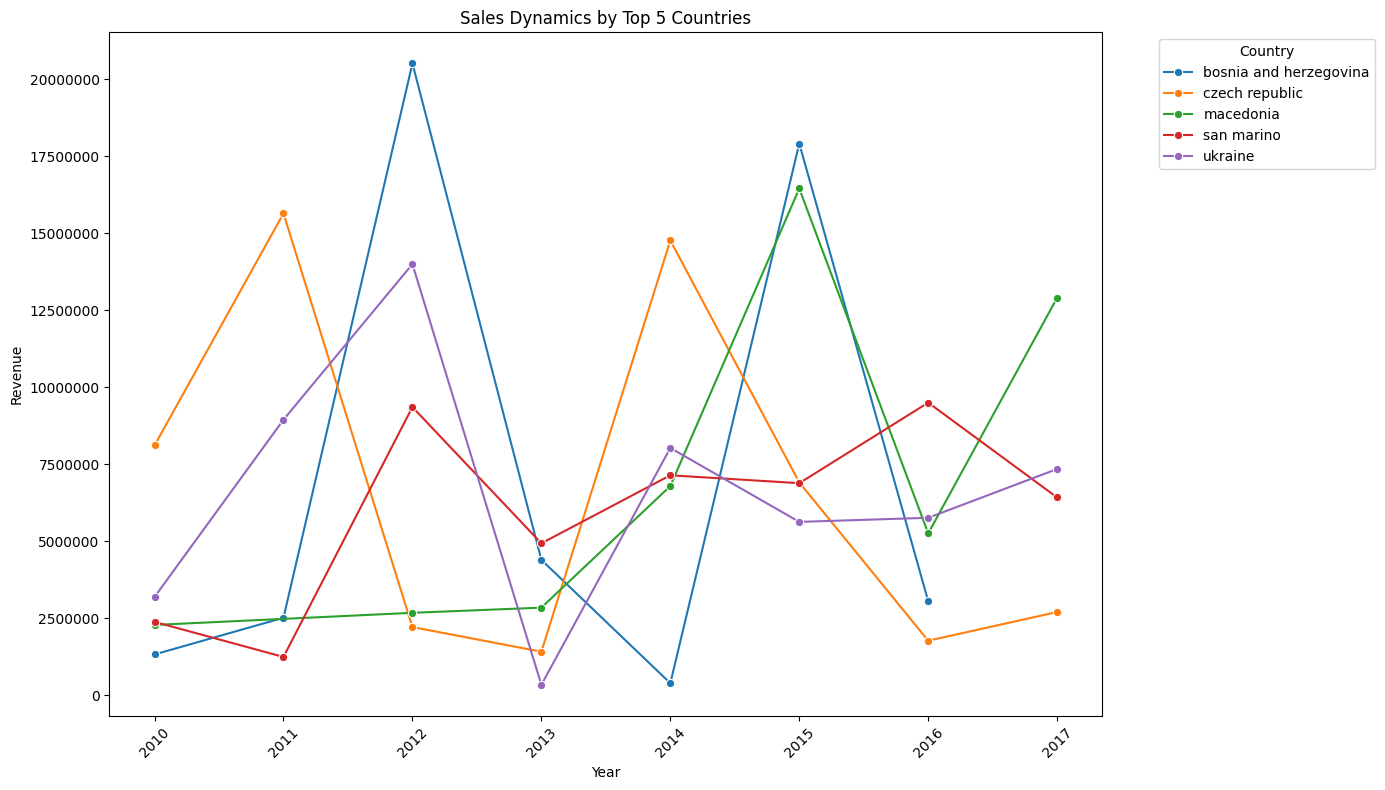

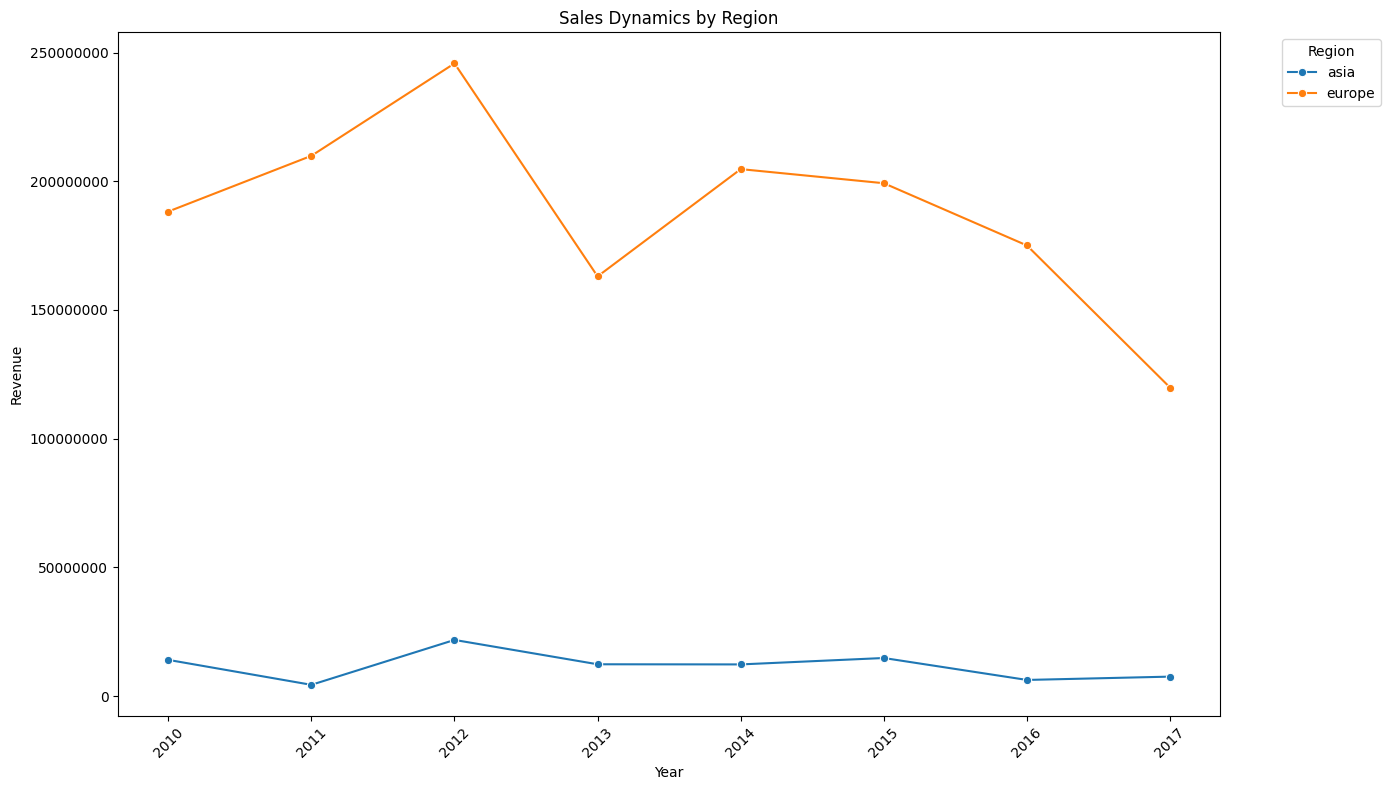

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Крок 1: Додаємо стовпець з роком
final_merged_data['Order Year'] = final_merged_data['Order Month'].dt.year

# Крок 2: Групуємо дані по роках для кожної країни та обчислюємо загальний дохід
sales_by_country_year = final_merged_data.groupby(['Order Year', 'Country Name']).agg({
    'Revenue': 'sum'
}).reset_index()

# Крок 3: Отримуємо топ-5 країн за загальним доходом
top_5_countries = sales_by_country_year.groupby('Country Name').agg({
    'Revenue': 'sum'
}).sort_values('Revenue', ascending=False).head(5).index

# Фільтруємо дані для топ-5 країн
top_5_sales_by_country_year = sales_by_country_year[sales_by_country_year['Country Name'].isin(top_5_countries)]

# Крок 4: Візуалізація динаміки продажів по топ-5 країнах
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_5_sales_by_country_year, x='Order Year', y='Revenue', hue='Country Name', marker='o')
plt.title('Sales Dynamics by Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Revenue')

# Зміна формату чисел на осях
plt.ticklabel_format(style='plain', axis='y')  # Це вимикає науковий формат для осі Y

plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Крок 5: Групуємо дані по роках для кожного регіону
sales_by_region_year = final_merged_data.groupby(['Order Year', 'region']).agg({
    'Revenue': 'sum'
}).reset_index()

# Крок 6: Візуалізація динаміки продажів по регіонах
plt.figure(figsize=(14, 8))
sns.lineplot(data=sales_by_region_year, x='Order Year', y='Revenue', hue='region', marker='o')
plt.title('Sales Dynamics by Region')
plt.xlabel('Year')
plt.ylabel('Revenue')

# Зміна формату чисел на осях
plt.ticklabel_format(style='plain', axis='y')  # Це вимикає науковий формат для осі Y

plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Можливі рекомендації для бізнесу**

## **Зміцнення позицій у Європі:**

Падіння продажів після 2013 року може бути пов’язане з посиленням конкуренції, зміною попиту або економічними факторами.

Рекомендується провести аналіз причин спаду та оновити маркетингову стратегію.

Можливі заходи: впровадження нових продуктів, спеціальних пропозицій або акцій для підтримки інтересу клієнтів.

## **Збільшення присутності в Азії:**

Продажі в регіоні стабільні, але поки невисокі.

Рекомендується розширити присутність на азійському ринку шляхом інвестицій у маркетинг, збільшення дистрибуції та адаптації продуктів до місцевих потреб.

Доцільно провести додаткові дослідження ринку, щоб визначити продукти чи послуги з найбільшим потенціалом попиту.

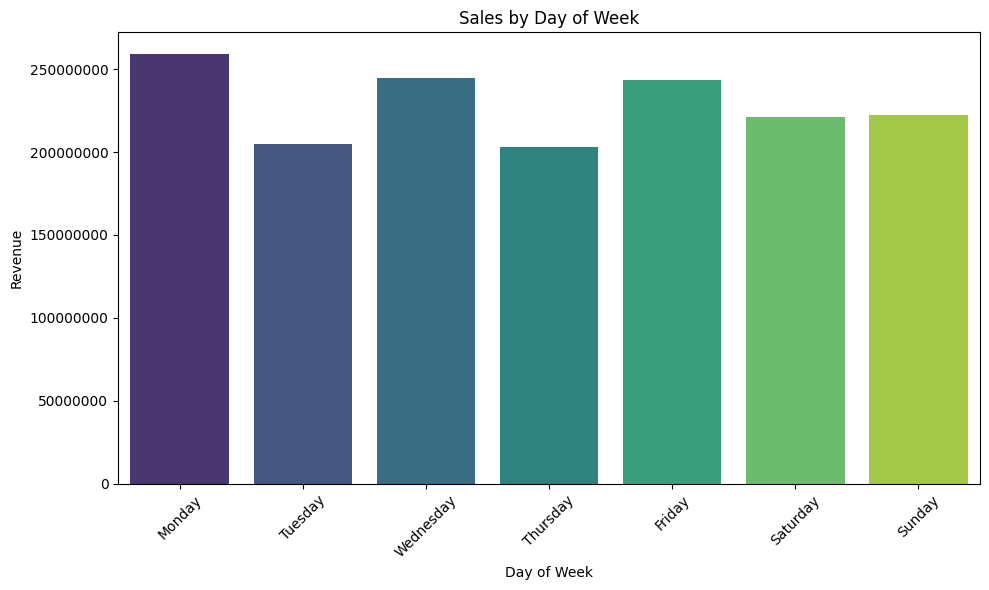

In [ ]:
# Витягуємо день тижня з дати замовлення
final_merged_data['Order Day of Week'] = final_merged_data['Order Date'].dt.dayofweek

# Групуємо дані за днями тижня та обчислюємо загальний дохід
sales_by_day_of_week = final_merged_data.groupby('Order Day of Week').agg({
    'Revenue': 'sum'
}).reset_index()

# Створюємо маппінг для днів тижня
day_of_week_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Заміна чисел на назви днів тижня
sales_by_day_of_week['Day of Week'] = sales_by_day_of_week['Order Day of Week'].map(day_of_week_map)

# Візуалізація продажів за днями тижня
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_day_of_week, x='Day of Week', y='Revenue', palette='viridis', hue='Day of Week', legend=False)
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Revenue')

# Зміна формату чисел на осі Y
plt.ticklabel_format(style='plain', axis='y')  # Це вимикає науковий формат для осі Y

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Аналіз доходів за днями тижня

**Найприбутковіший день – понеділок:**

Генерує найбільший дохід, що може свідчити про активний початок тижня для покупців, зокрема в офісах або онлайн.

**Плавне зменшення протягом тижня:**

Вівторок і середа показують деяке зниження доходу після піку в понеділок.

Четвер і п’ятниця демонструють невелике відновлення активності, ймовірно через підготовку до вихідних.

**Стабільність у вихідні:**

Субота і неділя мають приблизно однаковий рівень доходу, що свідчить про стабільні покупки, можливо у фізичних магазинах або онлайн, коли покупці мають більше вільного часу.

# **Рекомендації для бізнесу**

**Активізація продажів у вихідні:**

Запускати акції або спеціальні пропозиції у суботу та неділю, щоб залучити більше покупців.

Просувати товари, популярні серед сімей або для відпочинку.

**Збільшення доходу у вівторок і середу:**

Стимулювати попит середини тижня через знижки, програми лояльності або спеціальні онлайн-пропозиції.

Використовувати email-розсилки та рекламу в соцмережах для нагадування про акції.

**Підтримка високого попиту в понеділок:**

Оптимізувати запаси популярних товарів до понеділка.

Активно просувати товари, які купують для роботи або дому, у цей день.